# Search and Research interests in 'Kubernetes' and 'Managed Kubernetes'

## Housekeeping tasks

Install and import dependencies.

In [6]:
# RUN ONCE # 
!pip install pandas
!pip install matplotlib
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 89.9 MB/s eta 0:00:00


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

## Search Interests

Load the two files.

In [8]:
# Read the CSV files, skipping the first two lines and without headers
kubernetes_interests = pd.read_csv(
    'data/kubernetes-google-trend-search-interests.csv',
    skiprows=2,
    header=0,
    engine='python'
)

managed_kubernetes_interests = pd.read_csv(
    'data/managed-kubernetes-google-trend-search-interests.csv',
    skiprows=2,
    header=0,
    engine='python'
)

print(kubernetes_interests.head())
print(managed_kubernetes_interests.head())
print(kubernetes_interests.tail())
print(managed_kubernetes_interests.tail())

     Month  "kubernetes": (Worldwide)
0  2015-01                          1
1  2015-02                          1
2  2015-03                          2
3  2015-04                          2
4  2015-05                          2
     Month  "managed kubernetes": (Worldwide)
0  2015-01                                  0
1  2015-02                                  0
2  2015-03                                  0
3  2015-04                                  0
4  2015-05                                  0
       Month  "kubernetes": (Worldwide)
113  2024-06                         87
114  2024-07                         87
115  2024-08                         87
116  2024-09                         86
117  2024-10                         86
       Month  "managed kubernetes": (Worldwide)
113  2024-06                                 78
114  2024-07                                 78
115  2024-08                                 76
116  2024-09                                 71
117  2024-10    

Merge the two files.

In [9]:
# Rename the columns for clarity and consistency
kubernetes_interests.columns = ['Month', 'Kubernetes (Worldwide)']
managed_kubernetes_interests.columns = ['Month', 'Managed Kubernetes (Worldwide)']

merged_df = pd.merge(
    kubernetes_interests,
    managed_kubernetes_interests,
    on='Month',
    how='outer'
)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('data/merged-search-interests.csv', index=False)

Some pre-processing of the merged data.

In [10]:
# Load the dataframe
kube_search_interests = pd.read_csv('data/merged-search-interests.csv')

# Convert 'Month' to datetime
kube_search_interests['Month'] = pd.to_datetime(kube_search_interests['Month'])

# Set 'Month' as the index
kube_search_interests.set_index('Month', inplace=True)


Now we plot the data.

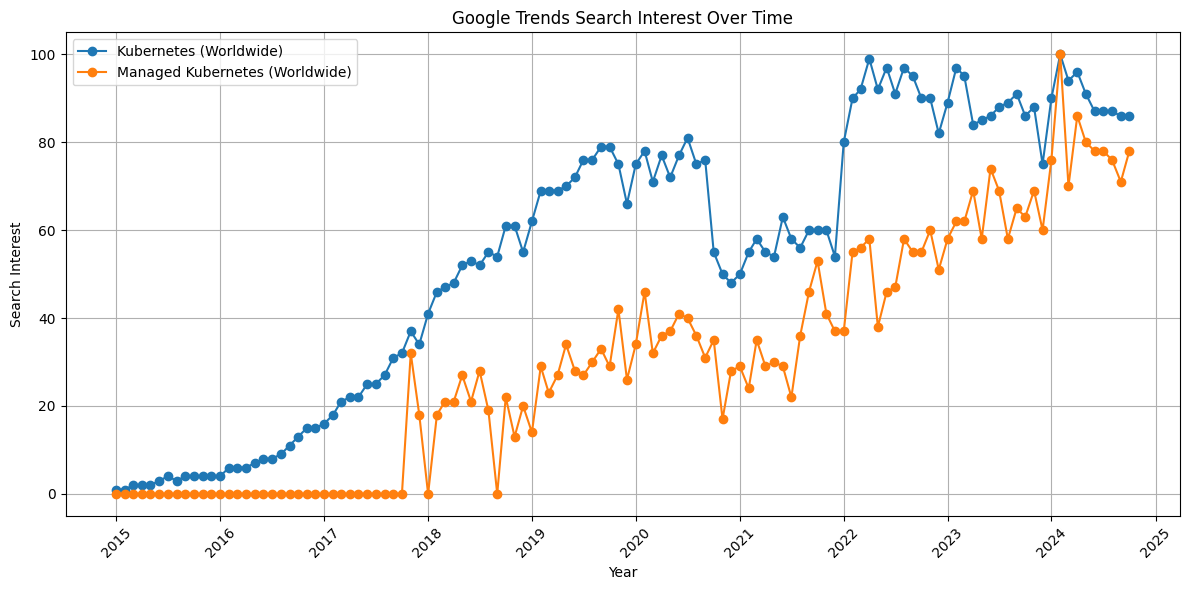

In [11]:
# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot each line
plt.plot(kube_search_interests.index, kube_search_interests['Kubernetes (Worldwide)'], label='Kubernetes (Worldwide)', marker='o')
plt.plot(kube_search_interests.index, kube_search_interests['Managed Kubernetes (Worldwide)'], label='Managed Kubernetes (Worldwide)', marker='o')

# Format the x-axis for dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Major ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tick labels as years

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Search Interest')
plt.title('Google Trends Search Interest Over Time')

# Add a legend
plt.legend()

# Add a grid
plt.grid(True)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()

## Research Publications

Load the data.

In [12]:
# Read the data from the text file
kubernetes_publications = pd.read_csv('data/kubernetes-publications.txt', sep='\t')
managed_kubernetes_publications = pd.read_csv('data/managed-kubernetes-publications.txt', sep='\t')

# View the dataframes
print(kubernetes_publications.head())
print(managed_kubernetes_publications.head())

   Publication Years  Record Count  % of 1,815
0               2024           298      16.419
1               2023           319      17.576
2               2022           339      18.678
3               2021           326      17.961
4               2020           215      11.846
   Publication Years  Record Count  % of 5
0               2024             2    40.0
1               2022             1    20.0
2               2020             1    20.0
3               2019             1    20.0


Merge the two dataframes.

In [13]:
# Only keep the publication and the publication years, drop all other columns
kubernetes_publications = kubernetes_publications[['Publication Years', 'Record Count']]
managed_kubernetes_publications = managed_kubernetes_publications[['Publication Years', 'Record Count']]

# Rename columns in kubernetes_publications
kubernetes_publications.rename(columns={
    'Record Count': 'Kubernetes Record Count',
}, inplace=True)

# Rename columns in managed_kubernetes_publications
managed_kubernetes_publications.rename(columns={
    'Record Count': 'Managed Kubernetes Record Count',
}, inplace=True)

# Merge the DataFrames on 'Publication Years' using an outer join
merged_publications = pd.merge(
    kubernetes_publications,
    managed_kubernetes_publications,
    on='Publication Years',
    how='outer'
)

# Fill NaN values with 0 in the merged DataFrame
merged_publications.fillna(0, inplace=True)

# Make sure the records are loaded as int
merged_publications['Managed Kubernetes Record Count'] = merged_publications['Managed Kubernetes Record Count'].astype(int)
merged_publications['Kubernetes Record Count'] = merged_publications['Kubernetes Record Count'].astype(int)

print(merged_publications.tail())

    Publication Years  Kubernetes Record Count  \
7                2020                      215   
8                2021                      326   
9                2022                      339   
10               2023                      319   
11               2024                      298   

    Managed Kubernetes Record Count  
7                                 1  
8                                 0  
9                                 1  
10                                0  
11                                2  


Save the merged dataframe.

In [14]:
# Save the merged DataFrame to a new CSV file
merged_publications.to_csv('data/merged-publications.csv', index=False)

Plot the data

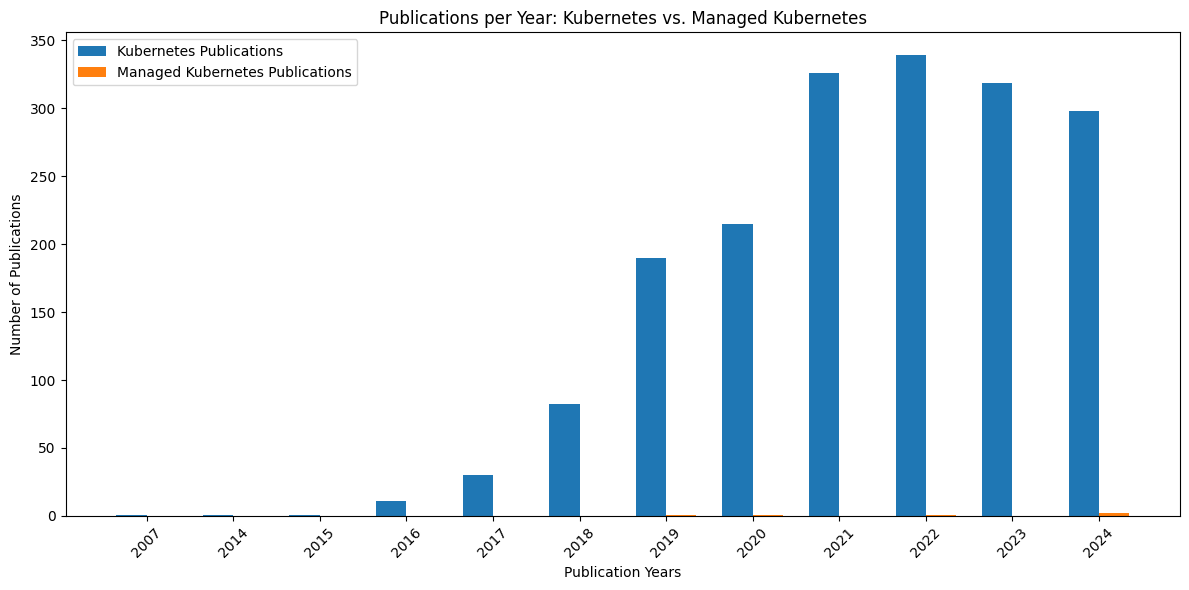

In [15]:
# Sort the DataFrame by 'Publication Years'
merged_publications.sort_values('Publication Years', inplace=True)

# Set up the positions and width for the bars
bar_width = 0.35
years = merged_publications['Publication Years'].astype(int).tolist()
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot Kubernetes Record Count
plt.bar(
    r1,
    merged_publications['Kubernetes Record Count'],
    width=bar_width,
    label='Kubernetes Publications',
)

# Plot Managed Kubernetes Record Count
plt.bar(
    r2,
    merged_publications['Managed Kubernetes Record Count'],
    width=bar_width,
    label='Managed Kubernetes Publications',
)

# Add labels and title
plt.xlabel('Publication Years')
plt.ylabel('Number of Publications')
plt.title('Publications per Year: Kubernetes vs. Managed Kubernetes')

# Add xticks on the middle of the group bars
plt.xticks([r + bar_width / 2 for r in range(len(years))], years, rotation=45)

# Add legend
plt.legend()

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()

### Expanding on the Research Publication results for 'managed kubernetes'

The results above for 'managed kubernetes' is surprisingly low. Let's expand on that further by using a broader search term. For the plot below, the following query was used on Web of Science: `TS=((EKS OR AKS OR GKE OR OCP) AND "kubernetes")`.

In [17]:
# Processing the data like we did above:
# Read the data from the text file
managed_kubernetes_publications_broaden_search = pd.read_csv('data/eks-aks-gke-ocp-broad-search-results.txt', sep='\t')

# View the dataframe
print(managed_kubernetes_publications_broaden_search.head())

   Publication Years  Record Count  % of 14
0               2024             3   21.429
1               2023             1    7.143
2               2022             2   14.286
3               2021             3   21.429
4               2020             2   14.286


/tmp/ipykernel_126414/1879132438.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


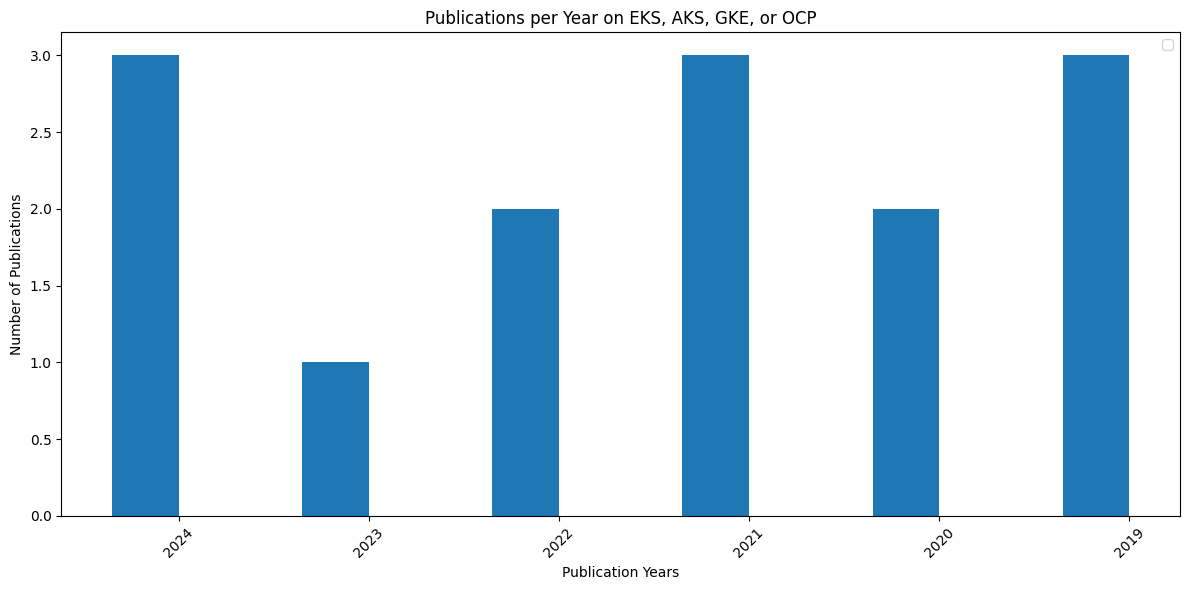

In [ ]:
# Set up the positions and width for the bars
bar_width = 0.35
years = managed_kubernetes_publications_broaden_search['Publication Years'].astype(int).tolist()
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot Kubernetes Record Count
plt.bar(
    r1,
    managed_kubernetes_publications_broaden_search['Record Count'],
    width=bar_width,
    color='orange'
    # label='Publications on EKS, AKS, GKE, or OCP',
)

# Add labels and title
plt.xlabel('Publication Years')
plt.ylabel('Number of Publications')
plt.title('Publications per Year on EKS, AKS, GKE, or OCP')

# Add xticks on the middle of the group bars
plt.xticks([r + bar_width / 2 for r in range(len(years))], years, rotation=45)

# Add legend
plt.legend()

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()